In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from growth.sweep.sweep import Sweep
%matplotlib inline

In [2]:
sweep_path = '../../../data/synthetic/Sweep_181201_191516'
sweep = Sweep.load(sweep_path)
sweep

1 x 16 sweep, 4 recombination generations

In [3]:
simulation = sweep[5]

In [58]:
4000/50700

0.07889546351084813

In [28]:
image = simulation.generate_microscopy(ambiguity=0.3, rho=0.5, bleedthrough=0.5)

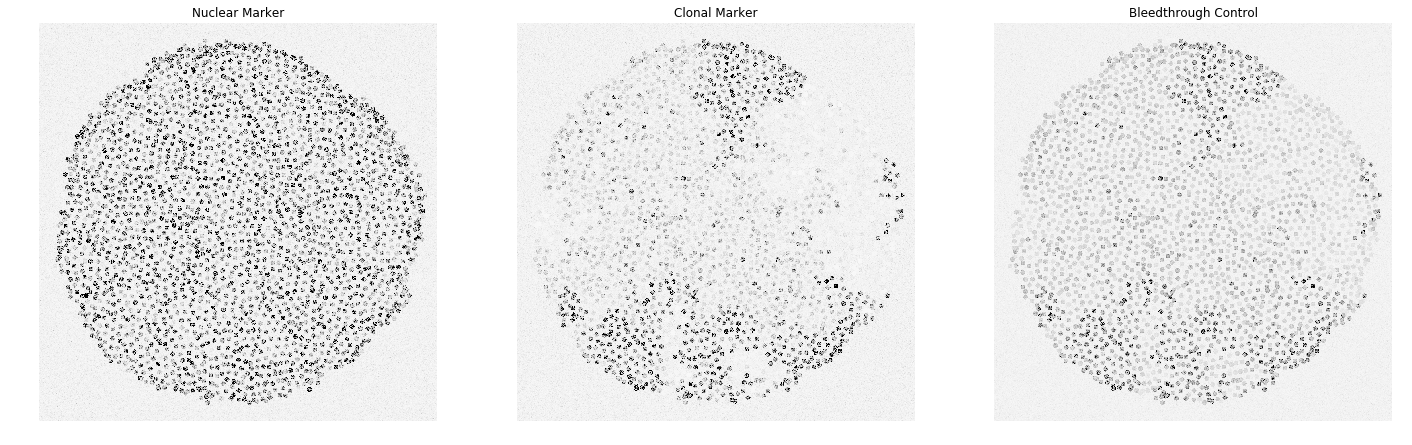

In [29]:
image.render()

In [40]:
clonal_marker = image.measure(1)
control = image.measure(2)

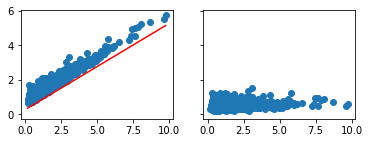

In [57]:
fig, (ax0, ax1) = plt.subplots(ncols=2, sharey=True, figsize=(6, 2))
ax0.scatter(clonal_marker, control)

clonal_marker_bg = image.extract_background(1)
control_bg = image.extract_background(2)
glm = GLM(clonal_marker_bg, control_bg)
domain = np.linspace(clonal_marker.min(), clonal_marker.max(), 100)
ax0.plot(domain, glm.predict(domain), '-r')

ax1.scatter(clonal_marker, control-glm.predict(clonal_marker))

In [39]:
from clones.bleedthrough.models import GLM

In [60]:
a = 10
b = 3

print(np.abs(np.log2(a/b)))
print(np.abs(np.log2(b/a)))

1.7369655941662063
1.7369655941662063


In [46]:
range = glm.predict(domain)

array([0.32465586, 0.33460461, 0.34455336, 0.35450211, 0.36445086,
       0.37439961, 0.38434836, 0.39429711, 0.40424586, 0.41419461,
       0.42414336, 0.43409211, 0.44404086, 0.45398961, 0.46393836,
       0.47388711, 0.48383586, 0.49378461, 0.50373336, 0.51368211,
       0.52363086, 0.53357961, 0.54352836, 0.55347711, 0.56342586,
       0.57337461, 0.58332336, 0.59327211, 0.60322086, 0.61316961,
       0.62311836, 0.63306711, 0.64301586, 0.65296461, 0.66291336,
       0.67286211, 0.68281086, 0.69275961, 0.70270836, 0.71265711,
       0.72260586, 0.73255461, 0.74250336, 0.75245211, 0.76240086,
       0.77234961, 0.78229836, 0.79224711, 0.80219586, 0.81214461,
       0.82209336, 0.83204211, 0.84199086, 0.85193961, 0.86188836,
       0.87183711, 0.88178586, 0.89173461, 0.90168336, 0.91163211,
       0.92158086, 0.93152961, 0.94147836, 0.95142711, 0.96137586,
       0.97132461, 0.98127336, 0.99122211, 1.00117086, 1.01111961,
       1.02106836, 1.03101711, 1.04096586, 1.05091461, 1.06086

In [ ]:
sm.families.Gaussian(link=sm.families.links.log)

In [37]:
import statsmodels as sm

In [ ]:
sm.tools.